In [1]:
def leaf_outline(image_path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load the image
    image = cv2.imread(image_path)

    # Display the image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create masks for the calibration cube, leaf, and scars
    green_lower = np.array([35, 40, 40])
    green_upper = np.array([85, 255, 255])

    # Create masks for the calibration leaf
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    # Find contours of the leaf
    leaf_contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contour = max(leaf_contours, key=cv2.contourArea)

    # Optionally display the results visually
    cv2.drawContours(image, [leaf_contour], -1, (0, 255, 0), 2)
    # cv2.imshow("Leaf outline", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Display the original and annotated images
    plt.subplot(1, 2, 2)
    plt.title('Leaf outline')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    return image, leaf_contour

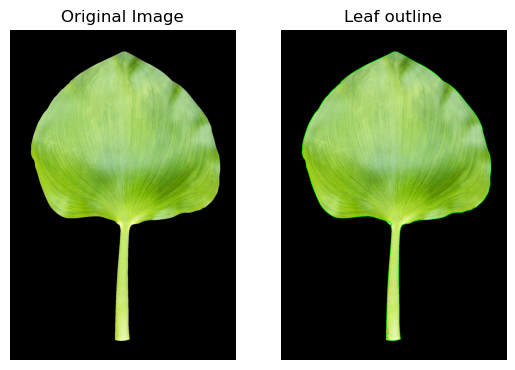

In [2]:
image, leaf_contour = leaf_outline("Sample Data/Original-leaf-black.png")

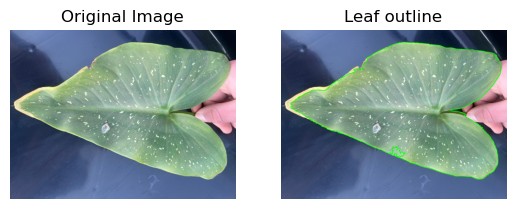

In [3]:
image, leaf_contour = leaf_outline("Sample Data/Leaf 1.jpeg")

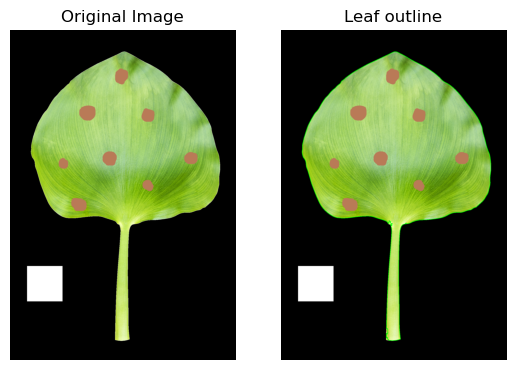

In [5]:
image, leaf_contour = leaf_outline("Sample Data/Leaf-with-scars-1.png")